# State Diagram Geometry

## Two States

In [ ]:
using PyPlot, Distributions, LaTeXStrings, PyCall
include("ndgrid.jl")

function myplot(p, p0=[0 0]; arrow=false, style="-", col="black", addtext=false)
    px,  py  = p
    px0, py0 = p0
    plot([px0, px], [py0, py], style, color=col) 
    if arrow
        annotate("", (px0, py0), (px, py), arrowprops={"arrowstyle"=>"<-", "color"=>col})
    end
    if addtext
        text(px, py, "($px, $py)")
    end
end

# Project y onto x
function proj(y,x)
    beta = (x'*x)\x' * y
    return beta .* x
end;


The contingent claims price vector points into the positive orthant. This is a consequence of positive marginal utilities and probabilities.

In [ ]:
pc = [0.6 0.9]'
function Fig1()
    myplot(pc*5, col="gray", style=":")
    myplot(pc, addtext=true, arrow=true)
    axis("scaled")
    axis((-1, 3, -1, 3))
end
Fig1();

Payoffs can be represented as vectors in $\mathbb{R}^2$

In [ ]:
function Fig2()
    Fig1()
    myplot([0.75, 2.5], addtext=true, arrow=true, col="red")
    myplot([1.5, 0.5], addtext=true, arrow=true, col="blue")
end
Fig2();

For any payoff vector $x\in\mathbb{R}^2$, its price can be written as an inner product with the contingent claims price vector:

$$
    p(x) = pc' x = \sum_s pc(s) x(s)
$$

Recall that inner products are simply a projection and a stretching:

$$
       p(x) = pc'x = |pc| \times |\text{proj}(x|pc)| 
$$

Now because $|pc|$ is the same for any payoff $x$, it's clear that all payoffs with identical projection onto $pc$ will have an _identical_ price, i.e.

$$
    p(x) = p(x^*) \qquad \forall x \; \text{s.t.} \; \text{proj}(x|pc) = \text{proj}(x^*|pc)
$$

Recall that projection geometrically means "traveling at a right angle". So we could do the following 

1. Pick some vector $x^*$ with price $pc'x^*=$\$2
2. Trace out a line through this point that intersects $pc$ at a right angle
3. Extend that line infinitely in either direction

Then this line will trace out the set of _all_ $x$ such that $p(x)=p(x^*)=2$ and $\text{proj}(x|pc)=\text{proj}(x^*|pc)$.

In [ ]:
function plotprice(pc, price)
    x,y = price ./ pc
    plot([0, x], [y, 0])
end
function Fig3(prices)
    Fig1()
    map(p -> plotprice(pc, p), prices)
end
Fig3(2);

And we could do this for all prices as depicted below. Importantly, the resulting constant-price lines must also be parallel since it would be a contradiction for distinct constant price lines to intersect. This also implies that $p(x)$ is a linear function.

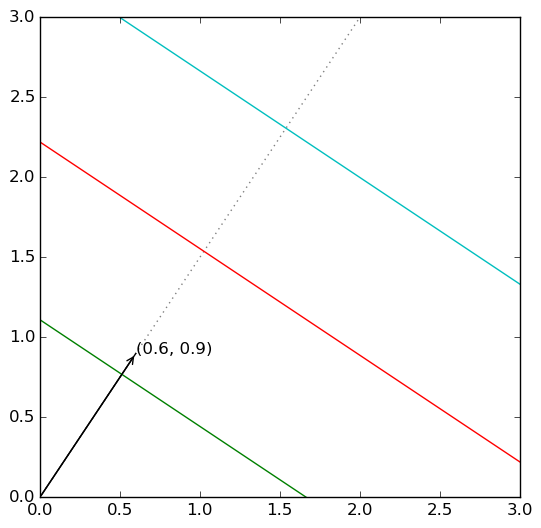

1x4 Array{Array{Any,1},2}:
 {PyObject <matplotlib.lines.Line2D object at 0x174ad610>}  …  {PyObject <matplotlib.lines.Line2D object at 0x174a84d0>}

In [463]:
Fig3([0 1 2 3])

To see the linearity of the pricing function more explicitly, we can abandon the inner product interpretation and instead treat the constant-price lines as what they really are: contour lines for a function $p(x)$ in the third dimension. Just as the contour lines and a linear $p(x)$ imply, $p(x)$ traces out a plane.

In [ ]:
function Fig4()
    X,Y = meshgrid(-1:0.1:3, -1:0.1:3)
    p = (pc[1]*X .+ pc[2]*Y)
    use = (p .> 0)
    plot_wireframe(X[use], Y[use], p[use], rstride=25, cstride=25)
end
Fig4()